In [1]:
# Scientific imports

%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astroquery.mast import Observations
from astroquery.mast import Catalogs

# General imports

import csv, math, os, os.path, sys, random
import pandas as pd
import seaborn as sb
from sklearn import metrics
from IPython.display import display

plt.rcParams["figure.figsize"] = (20,9)
sb.set()

In [2]:
# Function for Reading which LC datafiles we have into a list
def makingAList(prnt=False):
    fl = []
    fitsroot = "SIM_DATA/"
    fits_directories = [x[0] for x in os.walk('./SIM_DATA/.', topdown=True)]

    for fitsroot, fits_dirs, fits_files in os.walk(fitsroot):
        for fits_file in fits_files:
            fullpath = os.path.join(fitsroot, fits_file)
            if (os.path.splitext(fullpath.lower())[1]).endswith('.fits'):
                fl.append(fullpath)
    if prnt==True:
        print("Number of FITS files: {}".format(len(fl)))
    #print(len(fl))
    return fl

fitsList = makingAList()


In [3]:
# Keep track of current LC and it's TIC identifier
lastRandom={
    "number": 0,
    "id": 0
}

In [4]:
# Chooses a random number
def GetRandomLC(n = None):
    global lastRandom
    #print("1: {}".format(n))
    if not (isinstance(n, int)):
        n = random.randint(0,len(fitsList))
        lastRandom["number"] = n
        lastRandom["id"] = int(fitsList[n].split("-")[2])
        #print("NOT INT; NEW RANDOM -- {}".format(n))
        return n
    elif not(0 <= n < len(fitsList)):
        n = random.randint(0,len(fitsList))
        lastRandom["number"] = n
        lastRandom["id"] = int(fitsList[n].split("-")[2])
        #print("NOT IN RANGE; NEW RANDOM -- {}".format(n))
        return n
    else:
        n = random.randint(0,len(fitsList))
        lastRandom["number"] = n
        lastRandom["id"] = int(fitsList[n].split("-")[2])
        #print("Random number chosen: {}".format(n))
        return n
    
a = GetRandomLC()
print(lastRandom["number"])
print(lastRandom["id"])

67
468178302


In [14]:
# Chooses a random number
def GetRandomLC(n = None):
    global lastRandom
    #print("1: {}".format(n))
    if isinstance(n, int):
        if 0 <= n < len(fitsList):
            n = n
        else:
            n = random.randint(0,len(fitsList))
    else:
        n = random.randint(0,len(fitsList))
    
    lastRandom["number"] = n
    lastRandom["id"] = str(fitsList[n].split("-")[2].lstrip("0"))
    return n
    
a = GetRandomLC()
print(lastRandom["number"])
print(lastRandom["id"])

13194
401722469


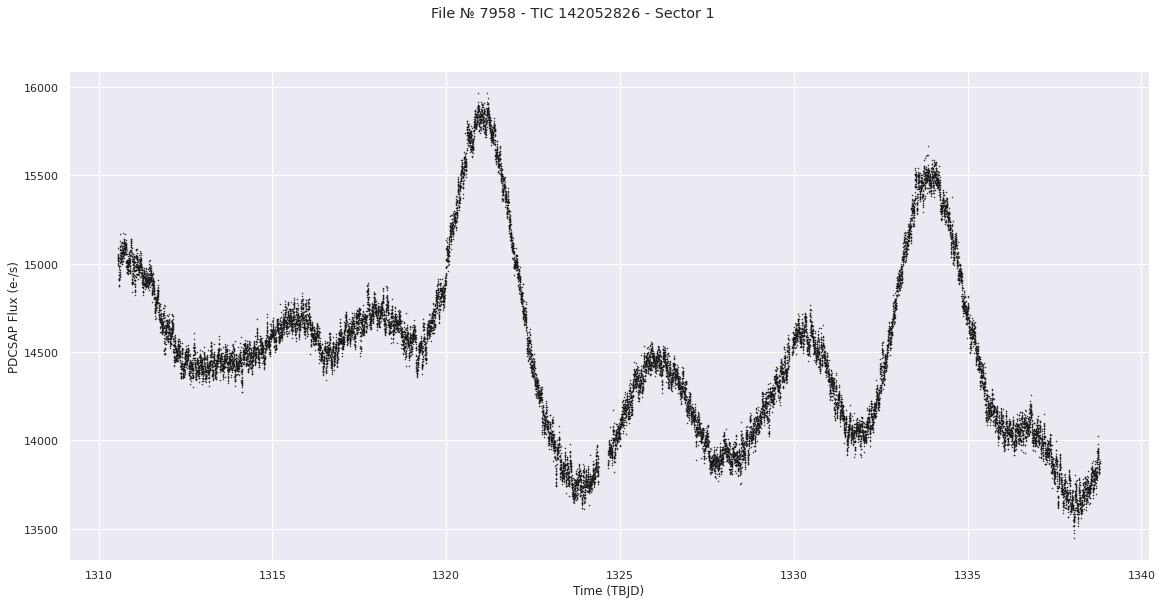

7958


In [96]:
# Plots a random Light Curve. If a number is specificed, it will plot THAT Light Curve.
def DrawACurve():
    rndFile = GetRandomLC()
    fitsFile = fitsList[rndFile]
    
    # The following line of code gives us the header values
    fitsHeaders = fits.getheader(fitsFile)

    with fits.open(fitsFile, mode="readonly") as hdulist:

        # Extract stellar parameters from the primary header.  We'll get the effective temperature, surface gravity,
        # and TESS magnitude.
        star_teff = hdulist[0].header['TEFF']
        star_logg = hdulist[0].header['LOGG']
        star_tmag = hdulist[0].header['TESSMAG']
        obj = hdulist[0].header['OBJECT']
        sector = hdulist[0].header['SECTOR']

        # Extract some of the fit parameters for the first TCE.  These are stored in the FITS header of the first
        # extension.
        #period = hdulist[1].header['TPERIOD']
        #duration = hdulist[1].header['TDUR']
        duration = (hdulist[1].header['LIVETIME'])
        #epoch = hdulist[1].header['TEPOCH']
        #depth = hdulist[1].header['TDEPTH']

        # Extract some of the columns of interest for the first TCE signal.  These are stored in the binary FITS table
        # in the first extension.  We'll extract the timestamps in TBJD, phase, initial fluxes, and corresponding
        # model fluxes.
        #times = hdulist[1].data['TIME']
        #phases = hdulist[1].data['PHASE']
        #fluxes_init = hdulist[1].data['LC_INIT']
        #model_fluxes_init = hdulist[1].data['MODEL_INIT']
        tess_bjds = hdulist[1].data['TIME']
        sap_fluxes = hdulist[1].data['SAP_FLUX']
        pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

    # Define the epoch of primary transit in TBJD.  Our timestamps are also already in TBJD.
    #t0 = 1327.520678

    # Start figure and axis.
    fig, ax = plt.subplots()

    # Plot the timeseries in black circles.
    ## Using the [1:-1] identifier to cut off the leading and trailing zeroes

    ax.plot(tess_bjds[1:-1], pdcsap_fluxes[1:-1], 'k.', markersize=1)

    # Center the x-axis on where we expect a transit to be (time = T0), and set
    # the x-axis range within +/- 1 day of T0.
    ########ax.set_xlim(t0 - 1.0, t0 + 1.0)

    # Overplot a red vertical line that should be where the transit occurs.
    ########ax.axvline(x=t0, color="red")

    # Let's label the axes and define a title for the figure.
    fig.suptitle("File № {} - {} - Sector {}".format(rndFile, str(obj), str(sector))) # + str(obj) + " - Sector " + str(sector))
    ax.set_ylabel("PDCSAP Flux (e-/s)")
    ax.set_xlabel("Time (TBJD)")

    # Adjust the left margin so the y-axis label shows up.
    plt.subplots_adjust(left=0.15)
    #plt.figure(figsize=(2,8))
    plt.show()

DrawACurve()
print(lastRandom["number"])

In [6]:
def LoadListGeneral(f):
    lst=[]
    try:
        # Assuming everything CAN go well, do this
        with open('./SIM_DATA/unpacked/{}'.format(f)) as df:
            csvdf = csv.reader(df)
            for lineholder in csvdf:
                line = lineholder[0]                # I don't know why but this makes it work better
                if line[0]!="#":                    # Ignore commented lines (lines w/ FIRST STRING ELEMENT is a # character)
                    lst.append(line.split()[0])       # Add line to list
                # endif
            # endfor
        # endwith
    except FileNotFoundError:
        print("FNF")
        return
    # end try
    return lst

j=LoadListGeneral("tsop301_planet_data.txt")
print(len(j))

6696


In [7]:
def LoadList(itemtype="all"):
    
    pl="tsop301_planet_data.txt"
    sl="tsop301_star_data.txt"
    ebl="tsop301_eb_data.txt"
    bebl="tsop301_backeb_data.txt"
    
    foundflag=False
    
    # itemtype = (S)tar, (P)lanet, (E)clipsing (B)inary, or (B)ack (E)clipsing (B)inary
    if itemtype.lower() in ["s", "star", "all"]:
        foundflag = True
        global starlist
        starlist = LoadListGeneral(sl)
        print("Loading star list: {}".format(sl))
    if itemtype.lower() in ["p", "planet", "all"]:
        foundflag = True
        global planetlist
        planetlist = LoadListGeneral(pl)
        print ("loading planet list: {}".format(pl))
    if itemtype.lower() in ["eb", "eclipsing binary", "eclipsingbinary", "all"]:
        foundflag = True
        global eblist
        eblist = LoadListGeneral(ebl)
        print ("loading eb list: {}".format(ebl))
    if itemtype.lower() in ["beb", "back eclipsing binary", "backeclipsingbinary", "all"]:
        foundflag = True
        global beblist
        beblist = LoadListGeneral(bebl)
        print ("loading beb list: {}".format(bebl))
        
    if foundflag:
        global alllists
        alllists = {"s": starlist, "p": planetlist, "eb": eblist, "beb": beblist}
        return
    else:
        # If an invalid selection has been entered
        print("You must enter either:\n"
               "* \"S\" (or \"Star\")\n"
               "* \"P\" (or \"Planet\")\n"
               "* \"EB\" (or \"Eclipsing Binary\")\n"
               "* \"BEB\" (or \"Back Eclipsing Binary\")")


In [44]:
starlist=[]
planetlist=[]
eblist=[]
beblist=[]
alllists = {}
LoadList()

#GetRandomLC()
print(lastRandom["number"])
print(lastRandom["id"])

Loading star list: tsop301_star_data.txt
loading planet list: tsop301_planet_data.txt
loading eb list: tsop301_eb_data.txt
loading beb list: tsop301_backeb_data.txt
10489
410346833


Now that we have populated every list, we can proceed to store each LC as a 1 x (many many number) array/dataframe/list/etc, and then search for the unique identifier in the lists. If it finds it, apply label (star/planet/eb/beb) so we can use that for TRAINING DATA and then once trained we can then run it on some data with UNKNOWN data (ie, vectors that DON'T have the extra label) and predict them.  
Can then see if true by searching that list for the number, and if yes then WIN else ERROR

In [87]:
# Easier to recall wrapper functions, for quality of life option

def IsThisAStar(n):
    return n in alllists["s"]
    
def IsThisAPlanet(n):
    return n in alllists["p"]

def IsThisAEB(n):
    return n in alllists["eb"]

def IsThisABEB(n):
    return n in alllists["beb"]

# Function to tell you what an item is
def WhatIsMyLC(n):
    lbl = []
    lbl.append("Star") if IsThisAStar(n) else lbl
    lbl.append("Planet") if IsThisAPlanet(n) else lbl
    lbl.append("EB") if IsThisAEB(n) else lbl
    lbl.append("BRB") if IsThisABEB(n) else lbl
    
    return "UNKNOWN" if lbl==[] else lbl

In [100]:
IsThisAStar(lastRandom["id"])

True

In [104]:
x = lastRandom["id"]
print(x)
print(WhatIsMyLC(x))

print(x in starlist)
print(x in planetlist)
print(x in eblist)
print(x in beblist)

142052826
['Star', 'Planet']
True
True
False
False


In [105]:
lastRandom

{'number': 7958, 'id': '142052826'}